# REGRESIÓN LINEAL SIMPLE

## 0. Importar las librerias

In [38]:
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
import pandas as pd
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns
import sklearn

%matplotlib inline

## 1. Datos

### Descripción

Dataset que relaciona las edades (años) con la altura (pulgadas) para niños y jóvenes entre 0 y 18 años.

In [39]:
df = pd.read_pickle('..\Datasets\AgesAndHeights.pkl')

## 2. Análisis Exploratorio

### 2.1 Información básica

In [40]:
df.shape

(100, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [42]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [43]:
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [44]:
df.tail()

,Age,Height
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154
99,13.117413,55.177407


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

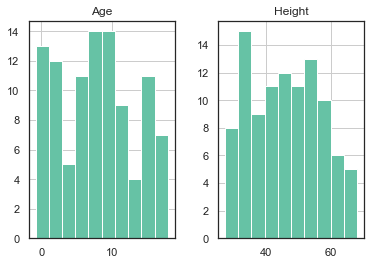

In [45]:
df.hist()

### 2.2 Limpieza

In [46]:
df_clean = df[df['Age'] > 0]

In [47]:
df_clean.shape

(93, 2)

In [49]:
df_clean.loc[:,'Height']=df_clean.loc[:,'Height']*2.54

In [50]:
df_clean.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,304.285970
std,4.975428,65.742034
min,0.195686,187.146049
25%,5.020210,247.016989
50%,8.433330,305.371968
75%,11.923862,353.237305
max,17.887852,439.808242


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

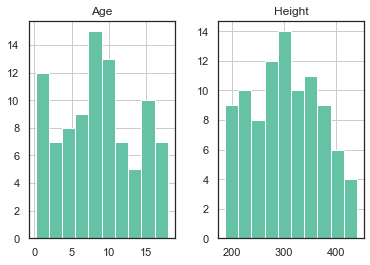

In [51]:
df_clean.hist()

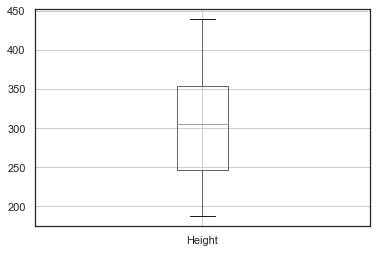

In [52]:
atributo_de_interes = 'Height'
df_clean.boxplot(column=[atributo_de_interes])
plt.show()

### 2.3 Correlaciones

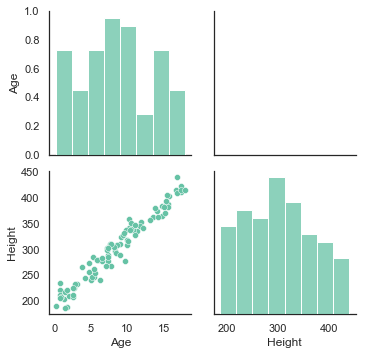

In [53]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean,diag_sharey=False, corner=False)

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

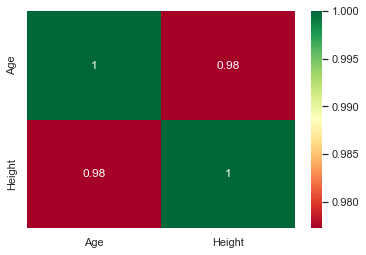

In [16]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

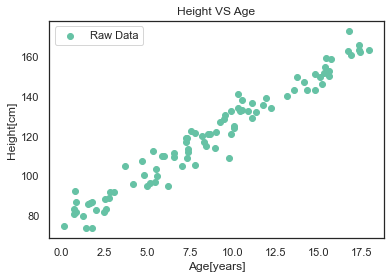

In [17]:
ages = df_clean['Age']
heights = df_clean['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.title('Height VS Age')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

## 3. Modelo

Cuando usamos un modelo de regresión lineal, estamos suponiento que los datos se comportan de la siguiente manera:

Actual -> $y = \omega_0 + \omega_1  x + \epsilon$

Donde $\epsilon$ es el ruido inherente a los datos.

Lo que tratamos de hacer es construir un modelo de la siguiente manera:

Predicción -> $\hat{y} = \omega_0 + \omega_1  x$

En el proceso de entrenamiento lo que se hace es obtener los parámetros $\omega_0$ y $\omega_1$ a partir de los datos.

### 3.1 Crear Modelo

Cada modelo tiene sus porpios hiperparámetros.

En el caso de la Regresión Lineal, se pueden consultar sus hiperparámetros en:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
- normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

En este ejemplo vamos a usar los hiperparámetros por defecto.

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

### 3.2 Preaparación y Particionamiento de los datos

- Crear los conjutos de entrenamiento y prueba (se puede crear también uno de validación, de acuerdo a la metodología que se esté utilizando).
- Revisar dimensiones y tipos, de tal forma que se puedan usar en las siguientes etapas.
- Normalizar si se considera necesario.

In [19]:
from sklearn.model_selection import train_test_split

y = df_clean['Height'].values
X = df_clean['Age'].values

print(y.shape)
print(X.shape)

(93,)
(93,)


In [54]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [55]:
print(y.shape)

(93, 1)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

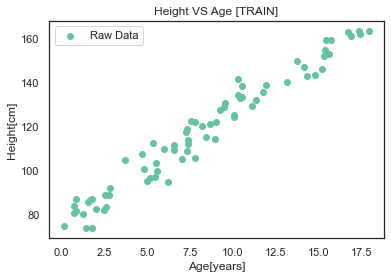

In [57]:
plt.scatter(X_train,y_train, label='Raw Data')
plt.title('Height VS Age [TRAIN]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

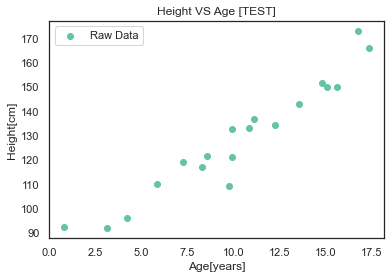

In [58]:
plt.scatter(X_test,y_test, label='Raw Data')
plt.title('Height VS Age [TEST]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

### 3.3 Entrenar Modelo

In [59]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [60]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

intercept [w0]= [75.63050217]
slope [w1]= [[5.11913056]]


## 4. Evaluación

### 4.1 Evaluar el modelo en el conjunto de entrenamiento

In [26]:
y_pred_train = lin_reg_model.predict(X_train)

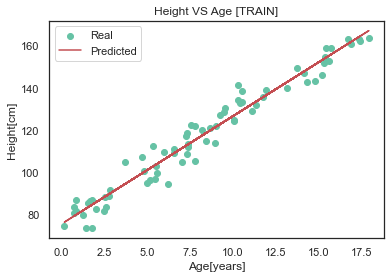

In [27]:
plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train,y_pred_train,'r', label='Predicted')
plt.title('Height VS Age [TRAIN]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

In [61]:
r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

coefficient R^2 for training data: 0.9596


In [62]:
e_train = y_train - y_pred_train

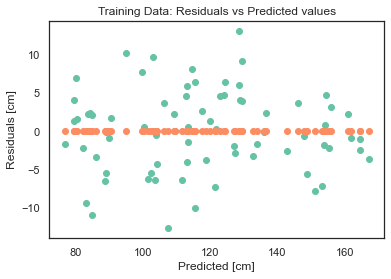

In [63]:
plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals [cm]')
plt.xlabel('Predicted [cm]')
plt.show()

In [31]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

MSE= 27.1483
RMSE: 5.2104


### 4.2 Evaluar el modelo en el conjunto de prueba

In [64]:
y_pred_test = lin_reg_model.predict(X_test)

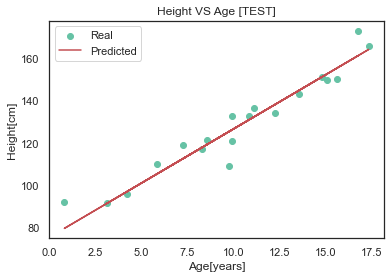

In [65]:
plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test,y_pred_test,'r', label='Predicted')
plt.title('Height VS Age [TEST]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

In [34]:
r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

coefficient R^2 for test data: 0.9223


In [66]:
e_test = y_test - y_pred_test

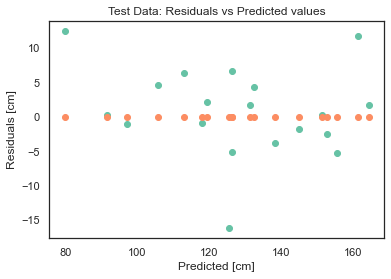

In [67]:
plt.scatter(y_pred_test,e_test)
b = np.zeros(len(e_test))
b = b.reshape(-1,1)
plt.scatter(y_pred_test,b)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [cm]')
plt.xlabel('Predicted [cm]')
plt.show()

In [68]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

MSE= 40.6577
RMSE: 6.3763
